In [25]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import lattice
#%matplotlib widget
import xrayutilities as xu
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np

# Generate new colormap for RSM display
rainbow = cm.get_cmap('YlGn', 256)
newcolors = rainbow(np.linspace(0, 1, 256))
white = np.array([1, 1, 1, 1])
newcolors[:20, :] = white
newcmp = ListedColormap(newcolors)



refHKL = (3, 1, -1)
iHKL = (0,0,-1)
#iHKL2 = (1,-1,0)
oHKL = (3, 1, 0)
subMat = 'LAO'
diry = r'C:\Users\oliver\OneDrive - UNSW\Experiments 2019\Xrays\P0127SA'
file = '\\P0095SA_RSM_310_phi90.ras'
rsmFile = lattice.lattice(refHKL, iHKL, oHKL, subMat, filepath=None, geometry = 'hi_lo')
rsmFile.load_sub()

experimental omega = 66.8905
experimental tt = 84.88
theoretical omega = 59.98768743118488
theoretical 2theta = 84.87857363478517
XU.analysis.fit_bragg_peak:fitted peak angles: 
	om = 66.8960
	tt = 84.8653
delta = (6.908287323797737, -0.013306657030398128)


<IPython.core.display.Javascript object>


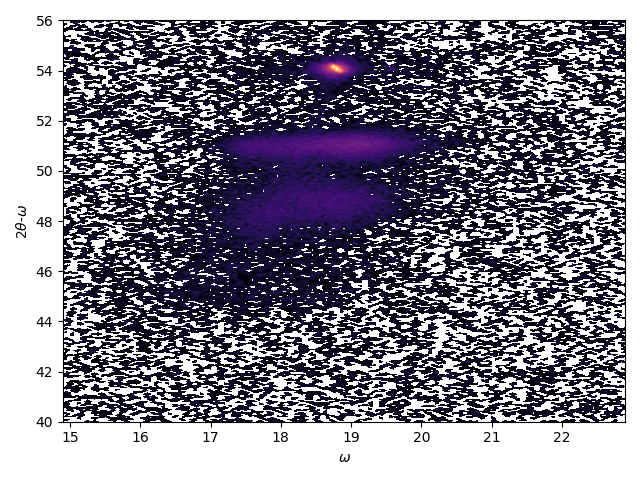

In [31]:
import matplotlib.pyplot as plt
import xrayutilities as xu
qPlot = rsmFile.plot2d(levels=50, cmap='magma')
#qPlot.colorbar('intensity')
#cl = plt.contour(rsmFile.gridder.xaxis, rsmFile.gridder.yaxis, xu.utilities.maplog( xu.math.Gauss2d(rsmFile.gridder.xmatrix, rsmFile.gridder.ymatrix, *rsmFile.p), 4, 0).T, 8, colors='k', linestyles='solid')

In [45]:
#%matplotlib widget
#ax = (rsmFile.plot2d( cmap='rainbow' ))
#ax2 = (rsmFile.plotQ(60,60))
%qtconsole

In [3]:
bcl, bparams, bcov = rsmFile.fit_zoom_peak(ax)
print('Peak centre is at omega = ' + str(bparams[0]) + ', 2theta = ' + str(bparams[1]) +  '. ')
print('Sigma_om = ' + str(bparams[2]) + ', and Sigma_tt = ' + str(bparams[3]) + '. ')



[37.9936, 41.9836, 61.0, 82.48]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 96078 but corresponding boolean dimension is 717

In [34]:
np.average([0.383,0.45,0.424,0.325])

0.39549999999999996

<IPython.core.display.Javascript object>


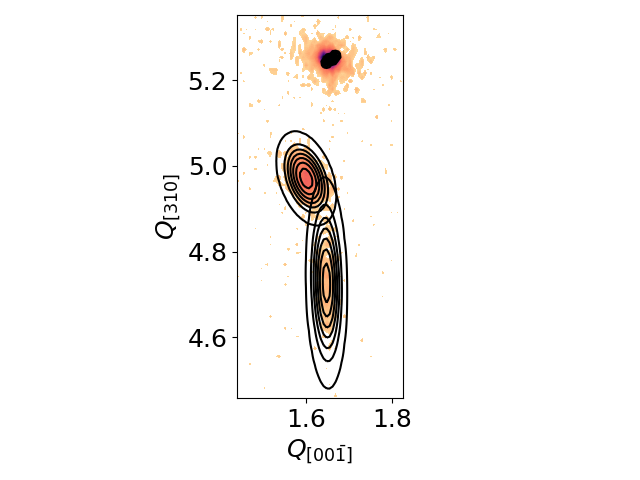

In [29]:
# Generate new colormap for RSM display
rainbow = cm.get_cmap('magma_r', 256)
newcolors = rainbow(np.linspace(0, 1, 256))
white = np.array([1, 1, 1, 1])
newcolors[:20, :] = white
newcmp = ListedColormap(newcolors)

%matplotlib notebook


fig, b = rsmFile.plotQ(120, 120, 4.4, 1, nlev=100, cmap=newcmp)
b.set_aspect(1)

#b.set_xlim(1.3,1.8)
#b.set_ylim(4.0,4.85)

#plt.savefig(rsmFile.filepath[:-4] + '_nice.png', transparent=True)


In [32]:
#from xu.math.functions import Gauss2DArea
bcl, bparams, bcov = rsmFile.fit_zoom_Qpeak(b)

print('Peak centre is at Qx = ' + str(bparams[0]) + ', Qz = ' + str(bparams[1]) +  '. ')
print('Sigma_om = ' + str(bparams[2]) + ', and Sigma_tt = ' + str(bparams[3]) + '. ')
bparams[2] = abs(bparams[2])
bparams[3] = abs(bparams[3])
area2D = xu.math.functions.Gauss2dArea(*bparams)
print(area2D)

[1.5507482873248009, 1.7437742069314361, 4.53760623651739, 4.87215827840017]
------------- DEBUGGING -----------
QxGrid size = (36, 28)
QzGrid size = (36, 28)
cropData size = (36, 28)
fit params = [ 1.64684124e+00  4.72702763e+00 -1.66223450e-02  8.53344276e-02
  9.48130684e-01  3.83596960e-01  2.11868824e+04]
Peak centre is at Qx = 1.6468412419209704, Qz = 4.727027627169962. 
Sigma_om = -0.01662234496512767, and Sigma_tt = 0.08533442757652195. 
0.00845015432956378


In [40]:
#from scipy.integrate import dblquad
print(str(bparams))
print(xu.math.functions.Gauss2dArea( *bparams ))

#f = xu.math.Gauss2d( bparams )
#dblquad(f, - np.inf, np.inf, - np.inf, np.inf)

[-2.54909426e-02  4.97516150e+00  2.58854448e-02  4.32811312e-02
  4.18977047e+00  6.60027358e-01  6.68406921e+05]
0.02949336564959637


In [22]:
import numpy as np
yminInd =  ( np.abs(rsmFile.gridder.yaxis[:] - b.get_ylim()[0]) ).argmin()
ymaxInd =  ( np.abs(rsmFile.gridder.yaxis[:] - b.get_ylim()[1]) ).argmin()
xminInd =  ( np.abs(rsmFile.gridder.xaxis[:] - b.get_xlim()[0]) ).argmin()
xmaxInd =  ( np.abs(rsmFile.gridder.xaxis[:] - b.get_xlim()[1]) ).argmin() 
cropQx = rsmFile.gridder.xaxis[xminInd:xmaxInd]
cropQz = rsmFile.gridder.yaxis[yminInd:ymaxInd]
print(cropQz.min())

fitRange = [rsmFile.gridder.xaxis[xminInd], rsmFile.gridder.xaxis[xmaxInd], rsmFile.gridder.yaxis[yminInd], rsmFile.gridder.yaxis[ymaxInd]]
print(fitRange)
#tupleIndex = np.unravel_index(np.argmax(self.gridder.data[yminInd:ymaxInd, xminInd:xmaxInd].flatten()), \
#             (len(self.gridder.data[yminInd:ymaxInd]), len(self.gridder.data[0, xminInd:xmaxInd])))
tupleIndex = np.unravel_index(np.argmax(rsmFile.gridder.data[xminInd:xmaxInd,yminInd:ymaxInd].flatten()), \
             (len(rsmFile.gridder.data[xminInd:xmaxInd, 0]), len(rsmFile.gridder.data[0,yminInd:ymaxInd])))


cropData = rsmFile.gridder.data[yminInd:ymaxInd, xminInd:xmaxInd]
#cropData = self.gridder.data[yminInd:ymaxInd, xminInd:xmaxInd]
cropQxGrid, cropQzGrid = np.meshgrid(cropQx, cropQz)

#xC = cropQxGrid[tupleIndex[0], tupleIndex[1]]
#yC = cropQzGrid[tupleIndex[0], tupleIndex[1]]
xC = cropQx[tupleIndex[0]]
yC = cropQz[tupleIndex[1]]
print(xC)
print(yC)
amp = rsmFile.gridder.data[tupleIndex]

xSigma = 0.1
ySigma = 0.1
angle = 0
background = 1
rsmFile.p = [xC, yC, xSigma, ySigma, amp, background, angle]
#print(rsmFile.gridder.xaxis.size)

xGrid, yGrid = np.meshgrid(rsmFile.gridder.xaxis, rsmFile.gridder.yaxis)

fitParams, cov = xu.math.fit.fit_peak2d(xGrid, yGrid, rsmFile.gridder.data.T, rsmFile.p, fitRange, xu.math.Gauss2d)

print('------------- DEBUGGING -----------')
print('QxGrid size = ' + str(cropQxGrid.shape))
print('QzGrid size = ' + str(cropQzGrid.shape))
print('cropData size = ' + str(cropData.shape))
print('fit params = ' + str(fitParams))
cl = b.contour( rsmFile.gridder.xaxis, rsmFile.gridder.yaxis, \
         np.log10(xu.math.Gauss2d( xGrid, \
         yGrid, *fitParams)), 8, colors='k', linestyles='solid')

5.144680250192037
[-0.08094806408540607, 0.06668700046871132, 5.144680250192037, 5.345092467790374]
0.002333254381019112
5.244886358991205
------------- DEBUGGING -----------
QxGrid size = (16, 39)
QzGrid size = (16, 39)
cropData size = (16, 39)
fit params = [-1.39318861e+00  1.04196270e+01 -3.18176077e+01 -2.07671906e+01
  9.66888269e+01  5.00031166e+01 -4.87693904e+07]


##### '''Get Omega rocking curve from RSM'''

In [20]:
om, omint, mask = xu.analysis.get_omega_scan([rsmFile.qy, rsmFile.qz], \
                                             rsmFile.data, [0, 4.3], 110, intrange=0.2, intdir='radial')


fig2, ax2 = plt.subplots()
ax2.plot(om, omint, label = 'RSM omega cut')


params, sd_params, itlim = xu.math.fit.gauss_fit(om, omint, iparams=[], maxit=300)

ax2.plot(om, xu.math.Gauss1d(om, *params), label='Gaussian fit')
ax2.legend()
ax2.set_xlabel('Omega (degrees)')
ax2.set_ylabel('intensity (a.u.)')
fwhm = xu.math.fit.fwhm_exp(om, xu.math.Gauss1d(om, *params))
print('FWHM = ' + str(fwhm))



ValueError: zero-size array to reduction operation maximum which has no identity

angPlot = rsmFile.plot2d()

In [ ]:
qCentre = rsmFile.hxrd.Ang2Q( (bparams[0] - rsmFile.delta[0]), (bparams[1] - rsmFile.delta[1]) )
qSigma = rsmFile.hxrd.Ang2Q( bparams[2], bparams[3])

cl = b.contour(self.omega[0,xminInd:xmaxInd], self.tt[yminInd:ymaxInd,0], \
                 np.log10(xu.math.Gauss2d(self.omega[yminInd:ymaxInd, xminInd:xmaxInd], \
                 self.tt[yminInd:ymaxInd,xminInd:xmaxInd], *fitParams)), 8, colors='k', linestyles='solid')

In [ ]:
#import numpy as np
xminInd = (np.abs(rsmFile.omega - angPlot.get_xlim()[0])).argmin()
xmaxInd = (np.abs(rsmFile.omega - angPlot.get_xlim()[1])).argmin()
yminInd = (np.abs(rsmFile.tt[:,0] - angPlot.get_ylim()[0])).argmin()
ymaxInd = (np.abs(rsmFile.tt[:,0] - angPlot.get_ylim()[1])).argmin()
#tupleIndex = np.array(dims=2)
tupleIndex = np.unravel_index(np.argmax(rsmFile.data[yminInd:ymaxInd][xminInd:xmaxInd].flatten()), (len(rsmFile.data[xminInd:xmaxInd][0]), len(rsmFile.data[0][yminInd:ymaxInd])))
#tupleIndex = np.unravel_index( indexMax, (len(rsmFile.gridder.data[:,0]), len(rsmFile.gridder.data[0,:])) )
fitRange = [rsmFile.data[xminInd], rsmFile.data[xmaxInd], rsmFile.data[yminInd], rsmFile.data[ymaxInd]]


#cropX, cropY = np.meshgrid(cropX, cropY)
#xC = rsmFile.omega[tupleIndex[0]]
#yC = rsmFile.tt[tupleIndex[1]]
xSigma = 0.1
ySigma = 0.1
amp = rsmFile.data[tupleIndex]
angle = 0
background = 1
#p = [xC, yC, xSigma, ySigma, amp, background, angle]
bfoQy = 0
bfoQz = 4.440
#params = [bfoQy, bfoQz, 0.01, 0.01, rsmFile.data[xminInd:xmaxInd, yminInd:ymaxInd].max(), 0, 0.]
#gaussFit = xu.fitpeak2d(cropX.flatten(), cropY.flatten(), cropData.flatten(), p, drange=[cropX[0], cropX[-1], cropY[0], cropY[-1]], xu.math.functions.Gauss2d(cropX, cropY,))

#fitParams, cov = xu.math.fit.fit_peak2d(rsmFile.qy.flatten(), rsmFile.qz.flatten(), \
#                                        rsmFile.data.flatten(), params, fitRange, xu.math.Gauss2d)


In [ ]:
gaussFit = xu.math.functions.Gauss2d(rsmFile.gridder.xdata, rsmFile.gridder.ydata, *p)
fitParams, cov = xu.math.fit.fit_peak2d(rsmFile.gridder.xdata[xminInd:xmaxInd], rsmFile.gridder.ydata[yminInd:ymaxInd], cropData, p, drange=[34, 35, 67, 69], gaussFit)

In [ ]:
i = rsmFile.find_nearest(rsmFile.gridder.xaxis, qPlot.get_xlim()[0] )

In [ ]:
yminInd =  ( np.abs(rsmFile.tt[:,0] - angPlot.get_ylim()[0]) ).argmin()
ymaxInd =  ( np.abs(rsmFile.tt[:,0] - angPlot.get_ylim()[1]) ).argmin()
xminInd =  ( np.abs(rsmFile.omega[0, :] - angPlot.get_xlim()[0]) ).argmin()
xmaxInd =  ( np.abs(rsmFile.omega[0, :] - angPlot.get_xlim()[1]) ).argmin() 
#xminInd = np.unravel_index((np.asarray(rsmFile.omega) - angPlot.get_xlim()[0]), (len(rsmFile.omega[:][0]), len(rsmFile.omega[0][:])))

tfig, tax = plt.subplots(2)
cl = tax[0].contour(rsmFile.omega[0,xminInd:xmaxInd], rsmFile.tt[yminInd:ymaxInd,0], \
                 np.log10(xu.math.Gauss2d(rsmFile.omega[yminInd:ymaxInd, xminInd:xmaxInd], \
                 rsmFile.tt[yminInd:ymaxInd,xminInd:xmaxInd], *fitParams)), 8, colors='k', linestyles='solid')
p1 = tax[0].contourf( rsmFile.omega[0,xminInd:xmaxInd], rsmFile.tt[yminInd:ymaxInd,0], np.log10(rsmFile.data[yminInd:ymaxInd, xminInd:xmaxInd]) )

p2 = tax[1].contourf(rsmFile.omega[0,:], rsmFile.tt[:,0], np.log10(rsmFile.data))